# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

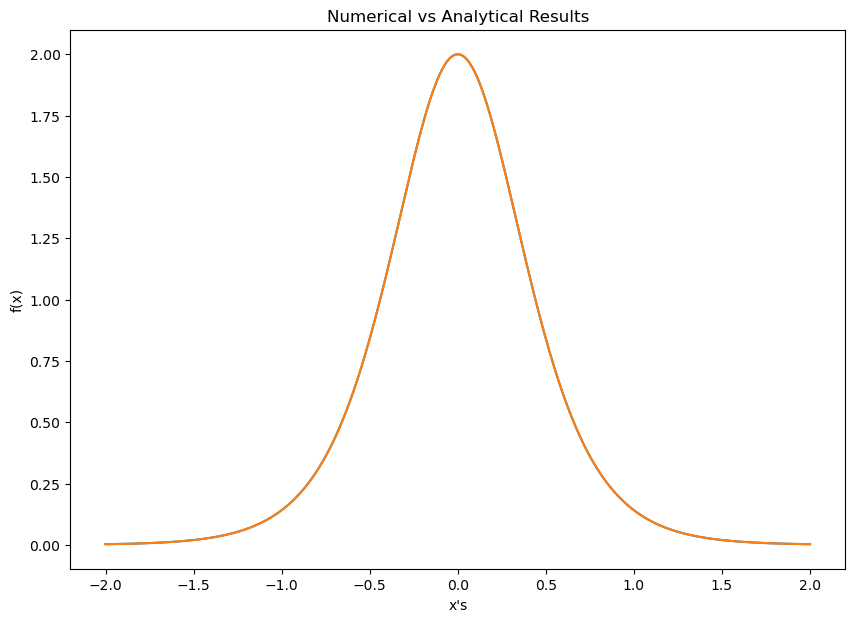

In [1]:
# So notes for myself: The derivative of tanh(x) is sech(x)^2. So, this derivative should be 2sech(2x)^2. Sech(x) is 1/cosh(x).
import numpy as np 
from matplotlib import pyplot as plt


def function1(x):
    return (1 + 1/2 + np.tanh(2*x))


def deriv(function,x,step_power,type="Forward"):
    step_size = 10**(step_power)
    if type == "Forward":
        return (function(x+step_size)-function(x))/step_size
    elif type == "Backward":
        return (function(x)-function(x-step_size))/step_size
    else: #This is central
        return (function(x+step_size/2)-function(x-step_size/2))/step_size

deriv_array = []
anal_array = [] 

x_array = np.arange(-2,2.01,0.01)
for i in range(-200,201): # range doesn't like floats so from -20 to 20 with i/10 to balance it out. So sampling at 0.1 intervals.
    deriv_array.append(deriv(function1,i/100,-2,"Central"))
    analytic_sol = 2*(1/np.cosh(2*i/100))**2
    anal_array.append(analytic_sol)

fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
plt.title("Numerical vs Analytical Results")
plt.xlabel("x's")
plt.ylabel("f(x)")
graph.plot(x_array,deriv_array)
graph.plot(x_array,anal_array)

I have a good approximation of the derivative as you can only see one line. For demonstration purposes, I do get different lines if the spacing is signifigantly bigger. I have chosen a step size of 10**(1/2) this time, purely because the graph of the numerical derivative vs x looks like a frown, which speaks to me.

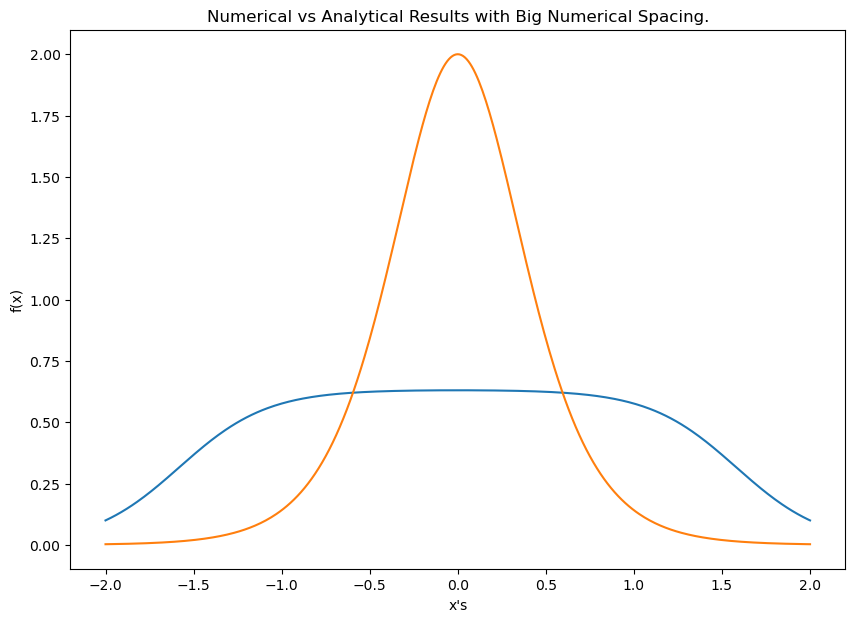

In [2]:
# Import and definitions are above so should be fine to delete them. I will rerun the rest though just to make sure all is good. Though, you can
# shorten this by just rerunning the deriv_array part and graphing again. However, I have gotten rather unfortunate as of late, so will not risk it.


deriv_array = []
anal_array = [] 

x_array = np.arange(-2,2.01,0.01)

for i in range(-200,201): # range doesn't like floats so from -20 to 20 with i/10 to balance it out. So sampling at 0.1 intervals.
    deriv_array.append(deriv(function1,i/100,1/2,"Central"))
    analytic_sol = 2*(1/np.cosh(2*i/100))**2
    anal_array.append(analytic_sol)

fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
plt.title("Numerical vs Analytical Results with Big Numerical Spacing.")
plt.xlabel("x's")
plt.ylabel("f(x)")
graph.plot(x_array,deriv_array)
graph.plot(x_array,anal_array)

Hence, I feel safe to conclude that my numerical derivative is a pretty good approximation though I'm not 100% sure about that.

#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

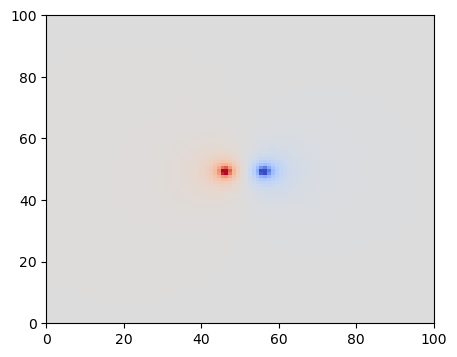

In [13]:
e0 = 8.85 * 10**(-12) #(F/m)

q1 = 1*10**(-9) # C
q2 = -q1 
distance = 10 #cm

grid_size = 100 #cm
grid_mid = grid_size/2 #cm
grid_spacing = 1 #cm


# So normally I only write a function if I think it has some use in the future; usually I'm thinking longer term, but I think this time it will be
# short term future.

def potential(x,y,qx,qy,q): # input: any point (x,y) compared to point of point charge (qx,qy) with charge q.
    soft_p = 1
    constant = 4*np.pi*e0
    radius = np.sqrt((x - qx)**2 + (y - qy)**2)
    if radius < soft_p:
        radius = soft_p
    result = (q / (constant*radius))
    return result

something = np.zeros([100,100], float)

for i in range(0,100,1):
    for j in range(0,100,1):
        something[j,i] = potential(i,j,45.75,50.25,q1) + potential(i,j,55.75,50.25,q2)


maxpot = np.max(np.abs(something)) #Maximum magnitude, so need max abs for that. (I feel like this should be a function already since it's common)


plt.figure(figsize = (5,4))
plt.imshow(something,cmap="coolwarm", vmax = maxpot,aspect="auto",origin="upper",extent = [0,100,0,100])

Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

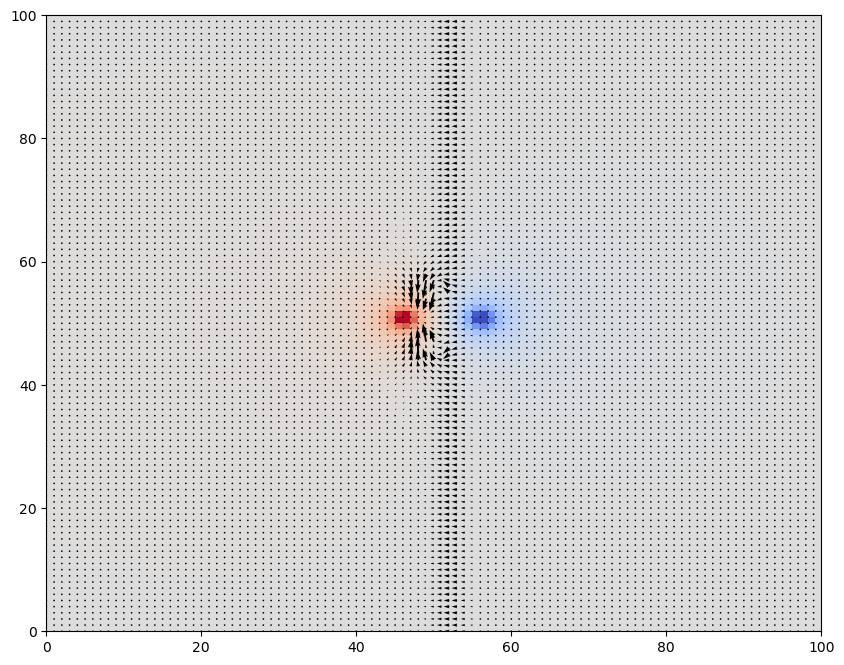

In [14]:
e0 = 8.85 * 10**(-12) #(F/m)

q1 = 1*10**(-9) # C
q2 = -q1 
distance = 10 #cm

grid_size = 100 #cm
grid_mid = grid_size/2 #cm
grid_spacing = 1 #cm

partialx = np.zeros_like(something)
partialy = np.zeros_like(something)
arrow = np.zeros_like(something)
N = len(partialx)

hard_p = 5

for i in range(0,N,1):
    index1 = i+1
    index2 = i-1
    #Boundary Conditions affect what index1 and 2 are
    if index1 >= N:
        index1 = N - 1
        index2 = N - 2
    if index2 <= 0:
        index1 = 1
        index2 = 0
        
    xstep_sz = index1 - index2
    
    for j in range(0,N,1):
        index3 = i+1
        index4 = i-1
        #Boundary Conditions affect what index1 and 2 are
        if index3 >= N:
            index3 = N - 1
            index4 = N - 2
        if index4 <= 0:
            index3 = 1
            index4 = 0
        ystep_sz = index3 - index4
        


        px = something[index1,j] - something[index2,j] / xstep_sz
        py = something[i,index3] - something[i,index4] / ystep_sz
        arrowlength = np.sqrt(px**2 + py**2)

        if arrowlength >= hard_p:
            px /= arrowlength
            py /= arrowlength


        
        partialx[j,i] = px
        partialy[j,i] = py
        
        
        arrow[i,j] = arrowlength

scaleterm = np.max(arrow)



plt.figure(figsize = (10,8))
plt.imshow(something,cmap="coolwarm", vmax = maxpot,aspect="auto",origin="lower",extent = [0,grid_size,0,grid_size])
plt.quiver(partialy,partialx,angles = "xy", scale = 200)

So I just wanted to redo the above but with a neater looking grid via ctrl c and v plus tasteful editing of previous two cells. The above *should* be right though.

### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

In [17]:
# First equation given: 4V1 - V2 -V3 -V4 = V+ = 5
# 2nd equation: (V2-V1) + (V2-V4) + (V2-0) = 0 ; -1V1 + 3V2 + 0V3 - 1V4 = 0
# 3rd equation: (V3-V1) + (V3-V4) + (V3-V+) = 0 ; -1V1 + 0V2 + 3V3 -1V4 = V+ = 5
# 4th equation: (V4-V1) + (V4-V2) + (V4-V3) + (V4-0) = -1V1 -1V2 -1V3 + 4V4 = 0
#The problem set up (in theory):


V = np.array([[4,-1,-1,-1],
            [-1,3,0,-1],
            [-1,0,3,-1],
            [-1,-1,-1,4]],float)
x = np.array([5,0,5,0],float)
N = len(V)

    
for i in range(0,len(V)):
    # This probably is the worst way to pivot, but this ended up working when it comes to actually pivoting?
    dummy = []
    dummy.append(V[i,i])
    for k in range(i+1,len(V)):
        value = np.abs(V[k,i])
        dummy.append(value)
    pivot = np.argmax(dummy)+i
    if (np.argmax(dummy) !=0):

        copy = np.zeros_like(V)
        xcopy = np.zeros_like(x)
        for z in range(0,N):
            if z == pivot:
                copy[z,:] = V[i,:]
            elif z == i:
                copy[z,:] = V[pivot,:]
            else:
                copy[z,:] = V[z,:]
        V = copy
    
        for y in range(0,N):
            if y == pivot:
                xcopy[y] = x[i]
            elif y == i:
                xcopy[y] = x[pivot]
            else:
                xcopy[y] = x[y]
        x = xcopy

    x[i] = x[i] / V[i,i]
    V[i,:] = V[i,:] / V[i,i] 
    for j in range(i+1,len(V)): 
        x[j] -= (x[i] * V[j,i])
        V[j,:] -= (V[i,:] * V[j,i]) 


voltages = np.zeros(4)
for a in range(N-1,-1,-1):
    voltages[a] = V[a,a]*x[a]
    for b in range(a+1,N):
        voltages[a] -= voltages[b] *V [a,b]

print(voltages)

[3.         1.66666667 3.33333333 2.        ]


In [18]:
V = np.array([[4,-1,-1,-1],
            [-1,3,0,-1],
            [-1,0,3,-1],
            [-1,-1,-1,4]],float)
x = np.array([5,0,5,0],float)
np.linalg.solve(V,x)

array([3.        , 1.66666667, 3.33333333, 2.        ])